### CodeCraft Infotech Data Science Task 2:
##### Name: Armand Faris A Surbakti
In this second data science project, I will be using the American Football Dataset "nflplaybyplay2009to2016". This dataset contains empty values and a few columns that need cleaning. I'll then perform EDA by visualizing graphs and looking at relationships of the data that is already clean.

Link to the dataset, and its details: https://github.com/ryurko/nflscrapR-data

Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load dataset and inspect it

In [2]:
df = pd.read_csv("nfldata.csv")

#set seed for reproducibility
np.random.seed(0)
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
#look at randomized samples of the data
df.sample(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
1983,2009-09-13,2009091311,13,2,NaN,00:12,1,1812.0,0.0,SEA,...,NaN,0.879098,0.120902,0.879098,0.120902,0.120902,0.000000,NaN,NaN,2009
190399,2013-09-29,2013092910,15,3,2.0,11:52,12,1612.0,35.0,OAK,...,NaN,0.677171,0.322829,0.647963,0.352037,0.677171,-0.029209,NaN,NaN,2013
135490,2012-09-09,2012090904,1,1,NaN,15:00,15,3600.0,0.0,NE,...,NaN,0.485675,0.514325,0.485675,0.514325,0.485675,0.000000,NaN,NaN,2012
60161,2010-10-18,2010101800,3,1,3.0,09:08,10,3248.0,40.0,TEN,...,NaN,0.277446,0.722554,0.265669,0.734331,0.722554,0.011777,NaN,NaN,2010
177931,2012-12-30,2012123008,24,4,1.0,08:59,9,539.0,42.0,DET,...,-0.539859,0.186027,0.813973,0.167521,0.832479,0.186027,-0.018507,-0.002936,-0.015571,2012


In [4]:
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


Before any visualizations, we'll start by cleaning our data to make sure there aren't any missing values

Let's see how many missing data points we have

In [6]:
#checkfor null values
miss_valsum = df.isnull().sum()
miss_valsum[0:19]

Date                 0
GameID               0
Drive                0
qtr                  0
down             54218
time               188
TimeUnder            0
TimeSecs           188
PlayTimeDiff       374
SideofField        450
yrdln              723
yrdline100         723
ydstogo              0
ydsnet               0
GoalToGo           723
FirstDown        25597
posteam          21979
DefensiveTeam    21979
desc                 2
dtype: int64

There seems to be a lot of missing data, especially in the down column. We'll remove that and fill in the rest of the data that only have a few missing columns and rows

In [7]:
#calculate total missing values
total_cells = np.product(df.shape)
total_missing = miss_valsum.sum()

#this will calculate percentage of data that is missing
miss_percentage = (total_missing/total_cells) * 100
print("The percentage of missing data is about {}%".format(miss_percentage))

The percentage of missing data is about 27.652267428200588%


In [8]:
#list  columns using a for loop
for col in df.columns:
    print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

#### Quick Analysis on why this data is empty
- TimeSec is number of seconds/time left in a game that probably was not recorded, which translates to NaN
- The 'down' column probably refers to current down, such as attempts to move the ball a few yards, and then other attemps too. The missing data might be   due to records incomplete records where down isn't relevant/recorded. 
- Some other columns probably experienced a similiar case.

In [9]:
miss_valsum[0:20]

Date                 0
GameID               0
Drive                0
qtr                  0
down             54218
time               188
TimeUnder            0
TimeSecs           188
PlayTimeDiff       374
SideofField        450
yrdln              723
yrdline100         723
ydstogo              0
ydsnet               0
GoalToGo           723
FirstDown        25597
posteam          21979
DefensiveTeam    21979
desc                 2
PlayAttempted        0
dtype: int64

We'll drop these columns:
- down
- FirstDOwn
- posteam
- DefenseTeam

Obviously there's more, but given the size of the dataset, we can just clean these first.

In [10]:
#drop columns with over 20.000 missing values
df.drop(columns=["down", "FirstDown", "posteam", "DefensiveTeam"], inplace=True)

Now, let's fill the missing values in the remaining columns.

In [11]:
#Fill missing values using the value directly below in the column
df.fillna(method='bfill', inplace=True)

In [12]:
#check for any missing values left:
print(df.isnull().sum())

Date        0
GameID      0
Drive       0
qtr         0
time        0
           ..
Win_Prob    0
WPA         0
airWPA      4
yacWPA      4
Season      0
Length: 98, dtype: int64


After Cleaning Data, let's also clean up duplicates in our data.

In [19]:
#check for duplicates
duplicates = df[df.duplicated()]
num_dups = duplicates.shape[0]
print(f"Number of Duplicate Rows: {num_dups}")

Number of Duplicate Rows: 0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 98 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         362447 non-null  object 
 1   GameID                       362447 non-null  int64  
 2   Drive                        362447 non-null  int64  
 3   qtr                          362447 non-null  int64  
 4   time                         362447 non-null  object 
 5   TimeUnder                    362447 non-null  int64  
 6   TimeSecs                     362447 non-null  float64
 7   PlayTimeDiff                 362447 non-null  float64
 8   SideofField                  362447 non-null  object 
 9   yrdln                        362447 non-null  float64
 10  yrdline100                   362447 non-null  float64
 11  ydstogo                      362447 non-null  int64  
 12  ydsnet                       362447 non-null  int64  
 13 

Now since our data is clean with decreased missing values and no duplicates, we can perform EDA.

#### Exploratory Data-Analysis (EDA)
Now, since we've done some data cleaning, we'll start doing Exploratory Data Analysis (EDA). We'll visualize plots to see relationships between the different data and columns.

Let's plot a bar plot to see how many plays occur in each quater

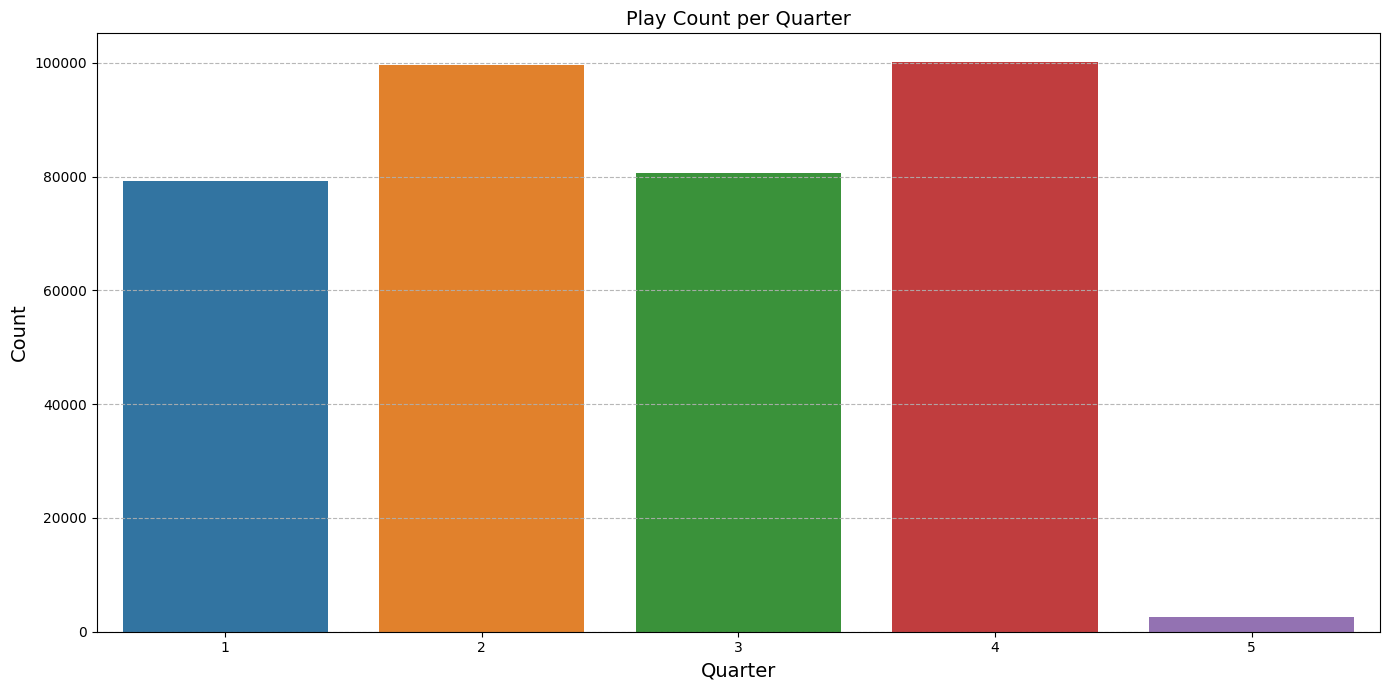

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='qtr', data=df)
plt.title("Play Count per Quarter", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

Let's do a quick correlation heatmap to identify relationshipw between numerical variables. We'll only do a few columns because this dataset is huge.

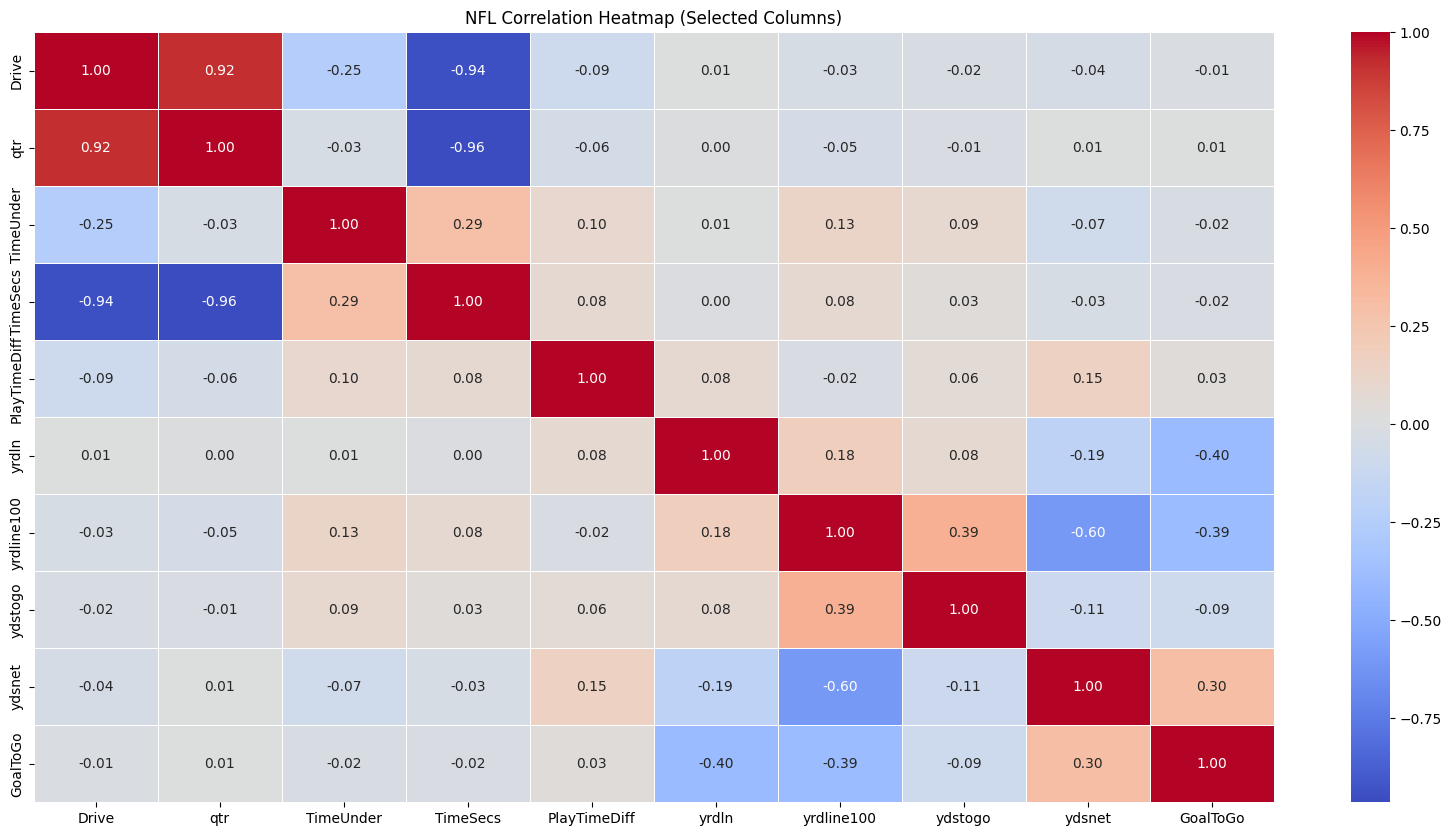

In [18]:
#columns for the heatmap
columns = [
    "Drive", "qtr", "time", "TimeUnder", "TimeSecs",
    "PlayTimeDiff", "yrdln", "yrdline100", "ydstogo", "ydsnet",
    "GoalToGo"
]

selected_df = df[columns].select_dtypes(include=['float64', 'int64'])

corr = selected_df.corr()

plt.figure(figsize=(20, 10))  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("NFL Correlation Heatmap (Selected Columns)")
plt.show()


Next, I'll want to identify and create a scatter plot to find relationships between ydstogo and TimeSecs

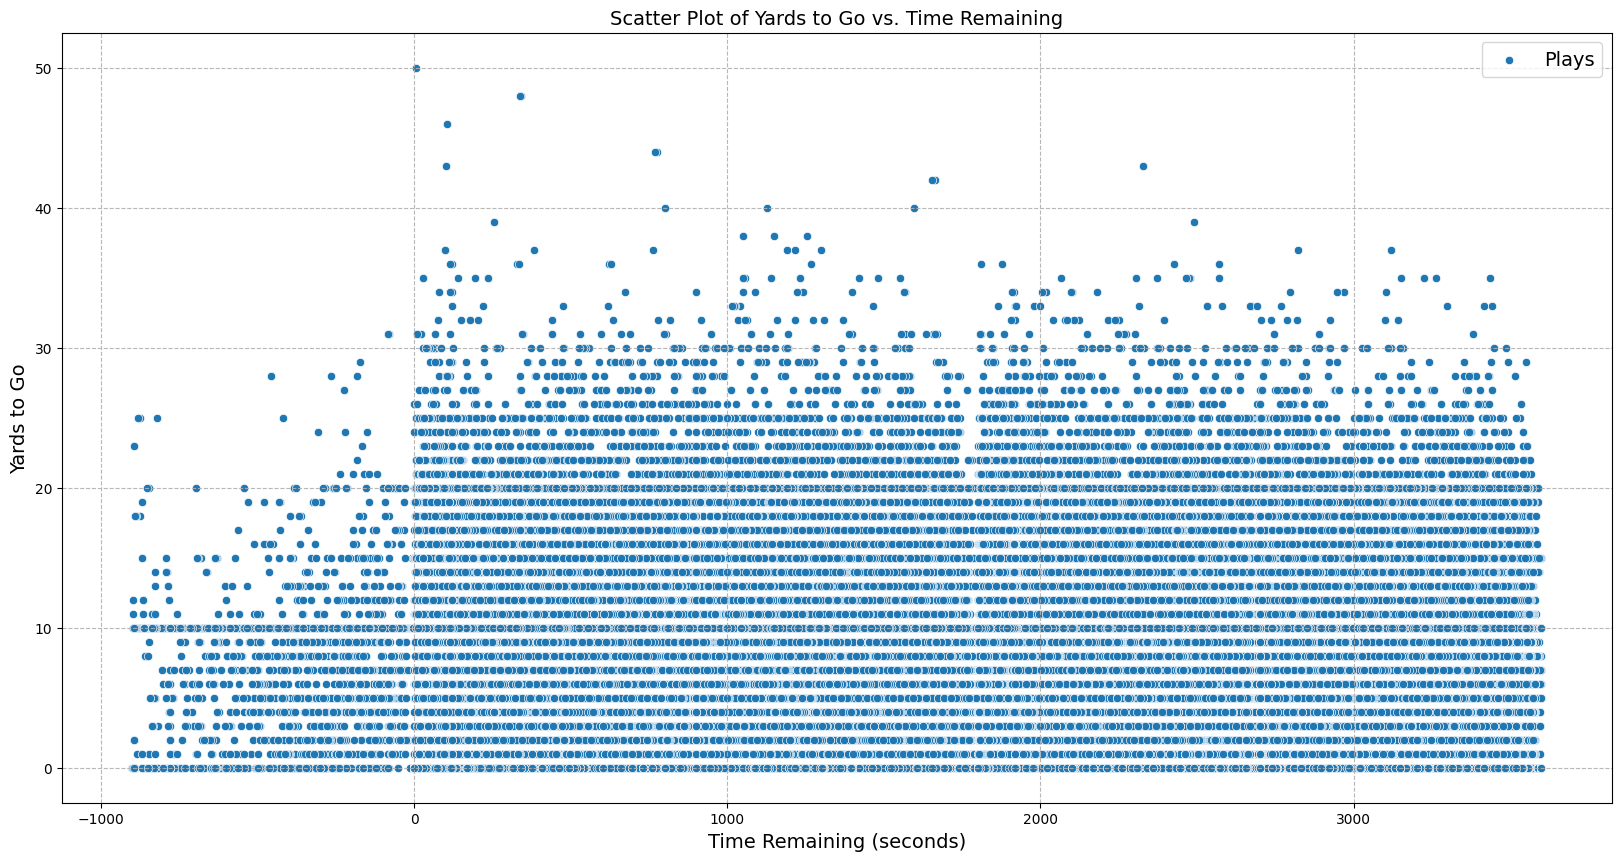

In [56]:
#relationship between ydstogo and timesecs
plt.figure(figsize=(20, 10))
sns.scatterplot(x='TimeSecs', y='ydstogo',data=df, label='Plays')
plt.title('Scatter Plot of Yards to Go vs. Time Remaining', fontsize=14)
plt.xlabel('Time Remaining (seconds)', fontsize=14)
plt.ylabel('Yards to Go', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.9)

plt.legend(loc='upper right', fontsize=14, frameon=True, title_fontsize=14)
plt.show()

Based on this scatter plot, there's mostly a horizontal trend, which indicates yards to go doesn't depend on the time remaining. There's some points that do have a small upwards trajectory but it's insignificant. There's a few outliers here and there. The clusters are bulked up in the 0 to 3000 seconds remain, which indicates these are different phases of the game.

Which Side of field sees the most play?
We can plot a simple countplot to see the Play Count by Side of Field

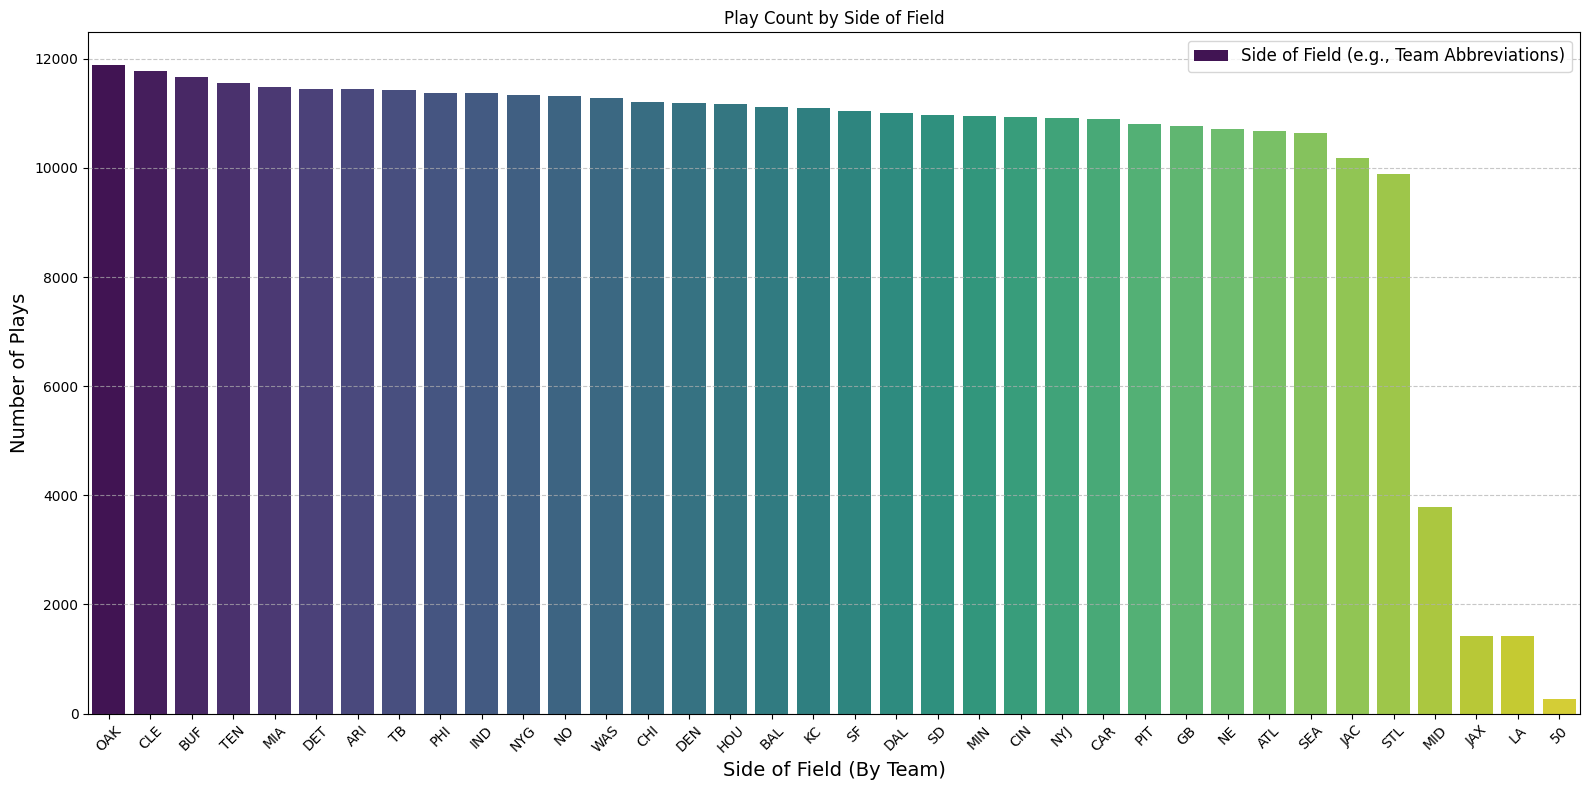

In [50]:
#add countplot to see play count by side of field
plt.figure(figsize=(16, 8))
sns.countplot(x='SideofField', data=df,  palette='viridis', order=df['SideofField'].value_counts().index)
plt.title("Play Count by Side of Field")
plt.xlabel('Side of Field (By Team)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Plays', fontsize=14)

#add legend
legend_labels = ['Side of Field (e.g., Team Abbreviations)']
plt.legend(legend_labels, loc='upper right', fontsize=12, frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Finally, We can do Time-Based Analysis using TimeSec and Time. We can plot the distribution of plays over game time and see number of plays over time using this scatterplot

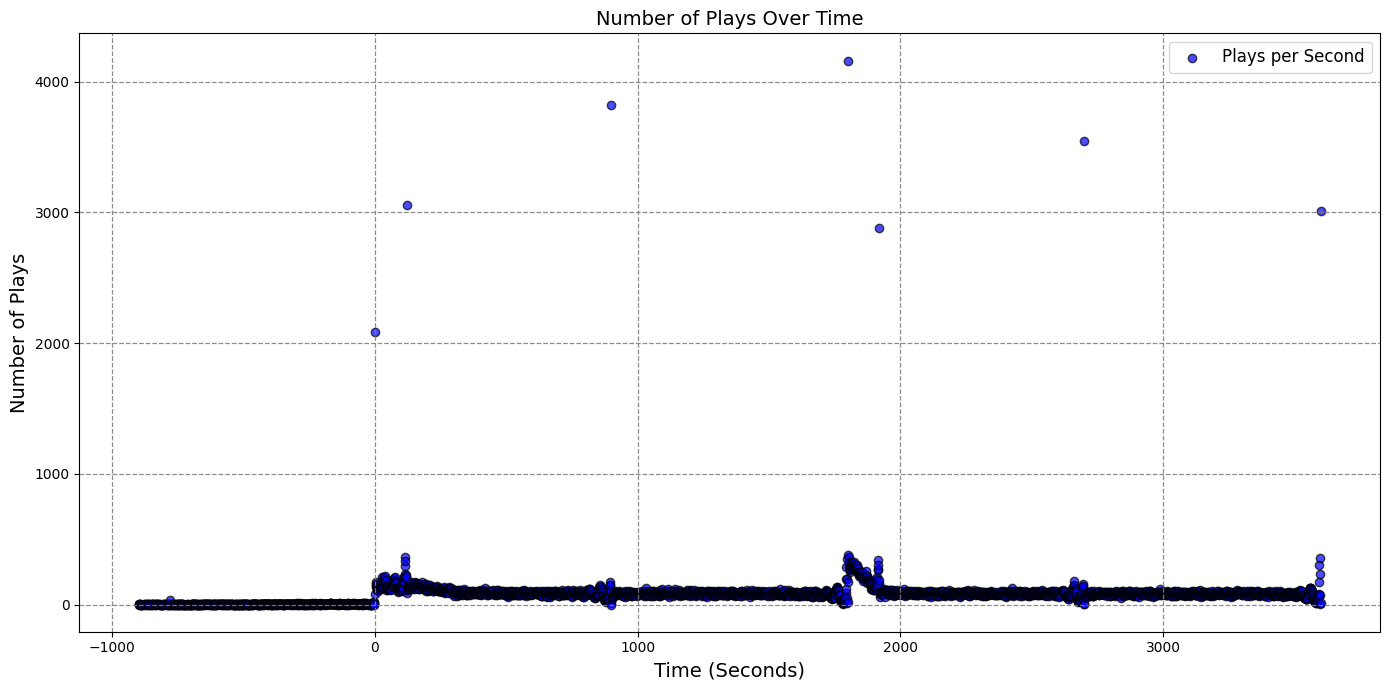

In [45]:
time_secs_play_counts = df.groupby('TimeSecs').size()
plt.figure(figsize=(14, 7))
plt.scatter(time_secs_play_counts.index, time_secs_play_counts.values, 
            alpha=0.7, 
            color='blue', 
            edgecolor='black', 
            label='Plays per Second')

plt.title("Number of Plays Over Time", fontsize=14)
plt.xlabel("Time (Seconds)", fontsize=14)
plt.ylabel("Number of Plays", fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.9, alpha=0.9)
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()
